In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

# read the whole experiment results
#df = pd.read_csv("./results/results_method1_v2_error_rate_add_noise_model-231022.csv")
#df = pd.read_csv("./results/results_new_waveform.csv")
#df=pd.read_excel("./results/cifar_data.xlsx")
#df=pd.read_csv("./results/results_new_cloth1m.csv")
#df=pd.read_csv("./results/results_UCI&synthetic2.csv")

#df=pd.read_csv("./results/results_g241c.csv")
df = pd.read_csv("./results/results_new_benchmark.csv")

In [83]:
df.head()

,noise_rate,error_rate,dataset,noise_type,causal,initial_noise,seed
0,0.1,0.49654,cifar10,sym,0,0.4,1
1,0.2,0.54504,cifar10,sym,0,0.4,1
2,0.3,0.59578,cifar10,sym,0,0.4,1
3,0.4,0.64520,cifar10,sym,0,0.4,1
4,0.5,0.69988,cifar10,sym,0,0.4,1


p1:  3.946557119950334e-15
p2:  4.4442227675745016e-13
slope:  -0.003729786133333354


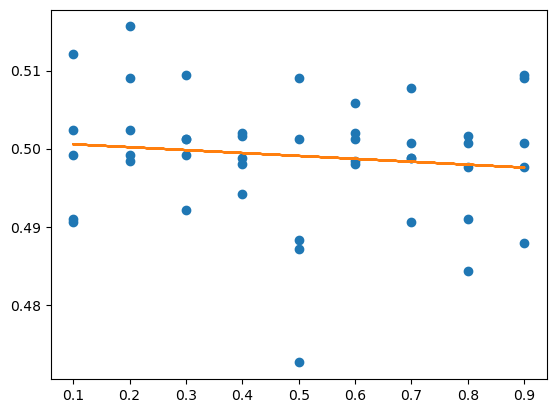

In [35]:

df_krkp=df[(df['dataset'] == 'krkp') & (df['noise_type']=='sym') & (df['initial_noise']==0.2 )]

slope, intercept, r, p, std =st.linregress(df_krkp['noise_rate'],df_krkp['error_rate'])

t1 = (slope - 0.05) / std
# single side t-test for t1
p1 = st.t.cdf(t1, df_krkp.shape[0] - 2)

t2 = (slope - -0.05)/ std
# single side t-test for t2
p2 = 1-st.t.cdf(t2, df_krkp.shape[0] - 2)

print("p1: ", p1)
print("p2: ", p2)
print("slope: ", slope)

plt.plot(df_krkp['noise_rate'],df_krkp['error_rate'],'o')
plt.plot(df_krkp['noise_rate'],slope*df_krkp['noise_rate']+intercept,'-')
# plt.text(0.1,0.52,'slope='+str(slope)+'\nintercept='+str(intercept)+'\nr='+str(r)+'\np='+str(p)+' std='+str(std))

In [58]:
df

,noise_rate,error_rate,dataset,noise_type,causal,initial_noise,seed
0,0.1,0.49654,cifar10,sym,0,0.4,1
1,0.2,0.54504,cifar10,sym,0,0.4,1
2,0.3,0.59578,cifar10,sym,0,0.4,1
3,0.4,0.64520,cifar10,sym,0,0.4,1
4,0.5,0.69988,cifar10,sym,0,0.4,1
...,...,...,...,...,...,...,...
17473,0.5,0.60504,cifar10n_random2,sym,0,0.2,3
17474,0.6,0.68002,cifar10n_random2,sym,0,0.2,3
17475,0.7,0.75380,cifar10n_random2,sym,0,0.2,3
17476,0.8,0.82478,cifar10n_random2,sym,0,0.2,3


In [289]:
# group by to calculate mean and std of error rate
df2=df.groupby(["dataset","noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
df2=df2['error_rate']
df2

mean       std
dataset noise_type inital_noise noisy_rate                    
g241c   instance   0.01         0.1         0.496000  0.022681
                                0.2         0.531600  0.014092
                                0.3         0.556133  0.017039
                                0.4         0.582667  0.014583
                                0.5         0.618133  0.008372
...                                              ...       ...
        sym        0.40         0.5         0.642800  0.010235
                                0.6         0.652933  0.009038
                                0.7         0.673733  0.008187
                                0.8         0.691333  0.015549
                                0.9         0.704400  0.008751

[81 rows x 2 columns]

In [3]:
# save csv file according to dataset
dataset_names = ['usps','coil','bci','coil2','digit1']
# 
#dataset_names=["cifar10", "cifar10n_worst", "cifar10n_aggre", "cifar10n_random1", "cifar10n_random2", "cifar10n_random3"]
#dataset_names=['secstr']
#dataset_names=["cloth1m"]

for name in dataset_names:
    path = './results/csv/'+name +'_groupby2.csv'
    df_temp = df[df['dataset']==name]
    df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
    df_temp = df_temp['error_rate']
    print(path)
    df_temp.to_csv(path)


./results/csv/usps_groupby2.csv
./results/csv/coil_groupby2.csv
./results/csv/bci_groupby2.csv
./results/csv/coil2_groupby2.csv
./results/csv/digit1_groupby2.csv


/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_82133/1157049356.py:11: FutureWarning: ['dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_82133/1157049356.py:11: FutureWarning: ['dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_temp = df_temp.groupby(["noise_type","inital_noise","noisy_rate"]).agg([np.mean, np.std])
/var/folders/z8/zm1gct552gb8700n_kq3pm9h0000gn/T/ipykernel_82133/1157049356.py:11: FutureWarning: ['dataset'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df_temp = df_temp.groupby(["noise_

In [152]:
df=pd.read_csv("./results/csv/krkp_groupby2.csv")
df[(df['noise_type']=='sym')]

,noise_type,inital_noise,noisy_rate,mean,std
162,sym,0.1,0.1,0.496948,0.004549
163,sym,0.1,0.2,0.499452,0.005820
164,sym,0.1,0.3,0.498122,0.008932
165,sym,0.1,0.4,0.497809,0.006603
166,sym,0.1,0.5,0.499687,0.015692
...,...,...,...,...,...
229,sym,0.9,0.5,0.500313,0.015692
230,sym,0.9,0.6,0.502191,0.006603
231,sym,0.9,0.7,0.501878,0.008932
232,sym,0.9,0.8,0.500548,0.005820


## plot figures

In [5]:
from asyncio import threads
from calendar import c
from operator import contains
from sys import stderr
import scipy.stats as st

from matplotlib.ticker import FormatStrFormatter


corr_table = pd.DataFrame(columns=['dataset','noise_type','initial_noise','corr/p-value','slope','stderr'])

#dataset_names = ["balancescale", "krkp", "waveform", "splice"]
dataset_names = ['usps','coil','bci','coil2','digit1']

#dataset_names=["cifar10","cifar10n_worst","cifar10n_aggre","cifar10n_random1", "cifar10n_random2", "cifar10n_random3"]
#dataset_names=['secstr']
#dataset_names=['cloth1m']

def generate_plot_individual(dataset_name, df, corr_table, threshold=0.1):
    
    #name_dict ={'yxguassian':'synAnticausal','xyguassian':'synCausal','balancescale':'BalanceScale','krkp':'KRKP','waveform':'Waveform','splice':'Splice','cifar10':'CIFAR10','cifar10n_worst':'CIFAR10N_Worst','cifar10n_aggre':'CIFAR10N_Aggre','cifar10n_random1':'CIFAR10N_Random1','cifar10n_random2':'CIFAR10N_Random2','cifar10n_random3':'CIFAR10N_Random3','cloth1m':'Cloth1M','secstr':'SecStr','g241c':'G241C'}

    name_dict ={'yxguassian':'yxGaussian','xyguassian':'xyGaussian','balancescale':'BalanceScale','krkp':'KRKP','waveform':'Waveform','splice':'Splice','cifar10':'CIFAR10','cifar10n_worst':'CIFAR10N_worst','cifar10n_aggre':'CIFAR10N_aggre','cifar10n_random1':'CIFAR10N_random1','cifar10n_random2':'CIFAR10N_random2','cifar10n_random3':'CIFAR10N_random3','usps':'USPS','digit1':'Digit1','coil':'Coil','coil2':'Coil2','bci':'BCI'}

    noise_dict = {'sym':'Sym','pair':'Pair','instance':'Ins'}

    if dataset_name in ['xyguassian','krkp','balancescale','splice','secstr']:
        color = 'blue'
    else:
        color = 'red'

    print(len(df))
    noise_type_list = ["sym","pair","instance"]
    # change 0.0 to 0.01
    #df.loc[df['inital']=='0.0']=0.01

    #print(df['inital_noise'])

    initial_noise_list = [0.01,0.2,0.4]

    for noise_type in noise_type_list:
        for initial_noise in initial_noise_list:
            
            df_temp = df[(df['noise_type']==noise_type) & (df['inital_noise']==initial_noise)]
            x=df_temp['noisy_rate']
            y =df_temp['mean']

            print(len(y))

            y_std = df_temp['std']

            # Define the 95% confidence interval of y
            #ci = st.t.interval(0.95, len(y)-1, loc=y, scale=st.sem(y))
            #print(ci)
            ci = y_std
            # calculate correlation coefficient
            #corr = np.corrcoef(x, y)[0, 1]
            corr = 0
            # regression
            slope, intercept, r_value, p_value, std_err = st.linregress(x, y)
            
            # upper bound of slope at 95% confidence interval
            slope_upper = slope + 1.96 * std_err
            # lower bound of slope at 95% confidence interval
            slope_lower = slope - 1.96 * std_err

            # t-test for slope
            alpha = 0.05

            # one-tail t-test for slope left side test:

            # H0: slope >= 0.05
            # H1: slope < 0.05
            t1 = (slope - threshold) / std_err
            # single side t-test for t1
            
            p1 = st.t.cdf(t1, df_temp.shape[0] - 1)


            # one-tail t-test for slope right side test
            
            # H0: slope <= -0.05
            # H1: slope > -0.05
            t2 = (slope - -threshold)/ std_err
            # single side t-test for t2
            p2 = 1-st.t.cdf(t2, df_temp.shape[0] - 1)
            maxp = max(p1, p2)
            #print("alpha/2:", alpha/2.0)

            # if max(p1,p2) < alpha/2.0 :
            #     output = "reject H0, slope <0.05 and >-0.05"                
            # else:
            #     output="cannot reject H0"
            output = ""
            print(output)

            plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

            y_pred = slope * x + intercept

            plt.plot(x, y,'*', color=color)
            plt.plot(x,y,'-',color=color)
            #plt.scatter(x, y, label=noise_type)     
            #plt.plot(x,y)
            plt.ylim(0,1)

                        
            #print('r-squared: '+str(round(r_value**2,4))+'\np-value: '+str(round(p_value,6))+'\nslope: '+str(round(slope,4)))
            #plt.text(0.1, 0.5, 'r-squared: '+str(round(r_value**2,4))+'\np-value: '+str(round(p_value,6))+'\nslope: '+str(round(slope,4)), fontsize=12)
           
            #plt.axis.set_major_formatter(FormatStrFormatter('%g'))
            plt.rcParams.update({'font.size': 18})
            plt.xlabel('Noise Rate')
            plt.ylabel('Error Rate')
            plt.xlim(0,1)

            if initial_noise == 0.01:
                initial_noise = 0

            plt.title("(" +name_dict[dataset_name]+", "+noise_dict[noise_type]+"-"+ str(initial_noise*100) +"%)"+output)
            
            # Plot the confidence interval
            plt.text(0.1, 0.8, '\np-value: '+f"{maxp:.4f}"+'\nslope: '+str(round(slope,4)), fontsize=18)
            plt.fill_between(x, (y-ci), (y+ci), color=color, alpha=0.2)
            plt.tight_layout(pad=0, w_pad=0, h_pad=0)
            plt.savefig('./results/pdf/'+dataset_name+'_'+noise_type+'_'+str(initial_noise)+'.pdf')
            # increase font size of title and axis
            

            #plt.show()
            #df_corr_temp= pd.DataFrame([[dataset_name, noise_type, initial_noise, corr]], columns=['dataset','noise_type','initial_noise','corr'])
            corr_table.loc[len(corr_table)] = [dataset_name, noise_type, initial_noise, maxp,slope,std_err]
            plt.close()

for name in dataset_names:
    if (True):   
        df = pd.read_csv("./results/csv/"+name +'_groupby2.csv')
        print(name)
        print(df.head())
        generate_plot_individual(name, df, corr_table,threshold=0.1)


usps
  noise_type  inital_noise  noisy_rate      mean       std
0   instance          0.01         0.1  0.387333  0.012979
1   instance          0.01         0.2  0.412933  0.006825
2   instance          0.01         0.3  0.444000  0.010077
3   instance          0.01         0.4  0.476133  0.009073
4   instance          0.01         0.5  0.498400  0.007537
81
9

9

9

9

9

9

9

9

9

coil
  noise_type  inital_noise  noisy_rate      mean       std
0   instance          0.01         0.1  0.677733  0.015787
1   instance          0.01         0.2  0.707733  0.025450
2   instance          0.01         0.3  0.726800  0.007504
3   instance          0.01         0.4  0.747200  0.014216
4   instance          0.01         0.5  0.761333  0.006683
81
9

9

9

9

9

9

9

9

9

bci
  noise_type  inital_noise  noisy_rate    mean       std
0   instance          0.01         0.1  0.4720  0.017446
1   instance          0.01         0.2  0.4845  0.028306
2   instance          0.01         0.3  0.4940 

# Table

In [293]:
corr_table.to_csv('./results/csv/corr_g241c.csv', index=False)

In [169]:
corr_table.head(10)

,dataset,noise_type,initial_noise,corr/p-value,slope,stderr
0,balancescale,sym,0.0,9.999999e-01,0.236400,0.008796
1,balancescale,sym,0.2,9.996638e-01,0.169067,0.012870
2,balancescale,sym,0.4,9.350959e-01,0.115067,0.008924
3,balancescale,pair,0.0,1.000000e+00,0.237267,0.006054
4,balancescale,pair,0.2,9.998654e-01,0.187933,0.014261
5,balancescale,pair,0.4,9.993361e-01,0.136400,0.007558
6,balancescale,instance,0.0,9.999582e-01,0.181533,0.011165
7,balancescale,instance,0.2,9.991038e-01,0.131067,0.006777
8,balancescale,instance,0.4,3.833053e-01,0.096133,0.012591
9,krkp,sym,0.0,5.921380e-09,0.003417,0.004128


In [11]:
# df1 = pd.read_csv('./results/csv/table/corr_table_UCI.csv')
# df11 = pd.read_csv('./results/csv/table/corr_table_secstr.csv')
# df111 = pd.read_csv('./results/csv/table/corr_table_cloth1m.csv')
# df1111= pd.read_csv('./results/csv/table/corr_table_cifar10_10n.csv')
# df3 = pd.concat([df1,df11,df111,df1111])

data_names = 'usps'

corr_table.to_csv('./results/csv/corr_'+data_names+'.csv', index=False)
df3 = pd.read_csv('./results/csv/corr_'+data_names+'.csv')
df3['slope']=df3['slope'].round(4).astype(str)
df3['stderr']=df3['stderr'].round(4).astype(str)

df3['output'] = "\makecell{"+df3['slope'] +'\pm'+ df3['stderr']+ '\\\\ p='+df3['corr/p-value'].round(4).astype(str)+"} &"

df3=df3.drop(['slope','stderr','corr/p-value'],axis=1)
df4=df3.groupby(['dataset','noise_type','initial_noise']).first().reset_index()
# convert df4 to multiindex
df4 = df4.set_index(['dataset','noise_type','initial_noise'])
# exchange columns and rows
df4 = df4.unstack(level=1)
df4 =df4.unstack(level=1)
df4.to_csv('./results/csv/table/corr_'+data_names+'.csv')
df4.head(10)

output  \
noise_type                                    instance   
initial_noise                                      0.0   
dataset                                                  
bci            \makecell{0.0585\pm0.0067\\ p=0.0001} &   
coil               \makecell{0.2055\pm0.005\\ p=1.0} &   
coil2             \makecell{0.0376\pm0.0045\\ p=0.0} &   
digit1            \makecell{0.6005\pm0.0057\\ p=1.0} &   
usps              \makecell{0.2826\pm0.0035\\ p=1.0} &   

                                                     \
noise_type                                            
initial_noise                                   0.2   
dataset                                               
bci            \makecell{0.0572\pm0.0052\\ p=0.0} &   
coil           \makecell{0.1689\pm0.0055\\ p=1.0} &   
coil2          \makecell{0.0287\pm0.0017\\ p=0.0} &   
digit1         \makecell{0.4361\pm0.0053\\ p=1.0} &   
usps           \makecell{0.1905\pm0.0053\\ p=1.0} &   

                                                        \
noise_type                                               
initial_noise                                      0.4   
dataset                                                  
bci            \makecell{0.0302\pm0.0147\\ p=0.0007} &   
coil            \makecell{0.1045\pm0.005\\ p=0.8044} &   
coil2             \makecell{0.0065\pm0.0067\\ p=0.0} &   
digit1          \makecell{0.1329\pm0.007\\ p=0.9992} &   
usps           \makecell{0.0523\pm0.0096\\ p=0.0005} &   

                                                        \
noise_type                                        pair   
initial_noise                                      0.0   
dataset                                                  
bci            \makecell{0.0842\pm0.0067\\ p=0.0228} &   
coil              \makecell{0.2032\pm0.0045\\ p=1.0} &   
coil2             \makecell{0.0504\pm0.0056\\ p=0.0} &   
digit1            \makecell{0.7301\pm0.0063\\ p=1.0} &   
usps               \makecell{0.3322\pm0.003\\ p=1.0} &   

                                                        \
noise_type                                               
initial_noise                                      0.2   
dataset                                                  
bci            \makecell{0.0735\pm0.0061\\ p=0.0012} &   
coil               \makecell{0.1624\pm0.003\\ p=1.0} &   
coil2             \makecell{0.0063\pm0.0112\\ p=0.0} &   
digit1            \makecell{0.4392\pm0.0052\\ p=1.0} &   
usps              \makecell{0.1892\pm0.0074\\ p=1.0} &   

                                                        \
noise_type                                               
initial_noise                                      0.4   
dataset                                                  
bci            \makecell{0.0365\pm0.0099\\ p=0.0001} &   
coil              \makecell{0.1336\pm0.0042\\ p=1.0} &   
coil2             \makecell{0.0158\pm0.0039\\ p=0.0} &   
digit1         \makecell{0.1412\pm0.0086\\ p=0.9993} &   
usps              \makecell{0.0456\pm0.0061\\ p=0.0} &   

                                                        \
noise_type                                         sym   
initial_noise                                      0.0   
dataset                                                  
bci            \makecell{0.0842\pm0.0067\\ p=0.0228} &   
coil               \makecell{0.203\pm0.0052\\ p=1.0} &   
coil2             \makecell{0.0504\pm0.0056\\ p=0.0} &   
digit1            \makecell{0.7301\pm0.0063\\ p=1.0} &   
usps               \makecell{0.3322\pm0.003\\ p=1.0} &   

                                                        \
noise_type                                               
initial_noise                                      0.2   
dataset                                                  
bci            \makecell{0.0735\pm0.0061\\ p=0.0012} &   
coil              \makecell{0.1487\pm0.0051\\ p=1.0} &   
coil2             \makecell{0.0063\pm0.0112\\ p=0.0} &   
digit1  

Empty DataFrame
Columns: []
Index: [(balancescale, 0.0961, 0.0126, 0.3833053147580259), (balancescale, 0.1151, 0.0089, 0.9350959499042651), (balancescale, 0.1311, 0.0068, 0.9991038166730328), (balancescale, 0.1364, 0.0076, 0.999336133777675), (balancescale, 0.1691, 0.0129, 0.9996638450429804), (balancescale, 0.1815, 0.0112, 0.9999581688612944), (balancescale, 0.1879, 0.0143, 0.9998653596519376), (balancescale, 0.2364, 0.0088, 0.9999998511406488), (balancescale, 0.2373, 0.0061, 0.9999999924198518), (cifar10, 0.4955, 0.0012, 1.0), (cifar10, 0.4977, 0.0006, 1.0), (cifar10, 0.5009, 0.0014, 1.0), (cifar10, 0.6926, 0.0005, 1.0), (cifar10, 0.6968, 0.0007, 1.0), (cifar10, 0.6992, 0.0006, 1.0), (cifar10, 0.8137, 0.0012, 1.0), (cifar10, 0.888, 0.0012, 1.0), (cifar10, 0.8881, 0.0014, 1.0), (cifar10n_aggre, 0.8137, 0.0012, 1.0), (cifar10n_aggre, 0.8254, 0.0009, 1.0), (cifar10n_aggre, 0.888, 0.0012, 1.0), (cifar10n_aggre, 0.8881, 0.0014, 1.0), (cifar10n_random1, 0.7444, 0.0012, 1.0), (cifar10n_random1, 0.8137, 0.0012, 1.0), (cifar10n_random1, 0.888, 0.0012, 1.0), (cifar10n_random1, 0.8881, 0.0014, 1.0), (cifar10n_random2, 0.7375, 0.0009, 1.0), (cifar10n_random2, 0.8137, 0.0012, 1.0), (cifar10n_random2, 0.888, 0.0012, 1.0), (cifar10n_random2, 0.8881, 0.0014, 1.0), (cifar10n_random3, 0.7385, 0.0008, 1.0), (cifar10n_random3, 0.8137, 0.0012, 1.0), (cifar10n_random3, 0.888, 0.0012, 1.0), (cifar10n_random3, 0.8881, 0.0014, 1.0), (cifar10n_worst, 0.523, 0.0011, 1.0), (cifar10n_worst, 0.5264, 0.0007, 1.0), (cifar10n_worst, 0.8137, 0.0012, 1.0), (cifar10n_worst, 0.888, 0.0012, 1.0), (cifar10n_worst, 0.8881, 0.0014, 1.0), (cloth1m, 0.1805, 0.0001, 1.0), (krkp, 0.0034, 0.0041, 5.921380102314533e-09), (krkp, 0.0137, 0.0028, 7.420586559388685e-10), (krkp, 0.0162, 0.0021, 8.974748365324048e-11), (krkp, 0.0174, 0.0062, 4.967021391284181e-07), (krkp, 0.0195, 0.0042, 2.593932786916324e-08), (krkp, 0.0256, 0.0047, 1.309678090176951e-07), (secstr, 0.0119, 0.0012, 6.327558585383742e-13), (secstr, 0.0134, 0.0011, 3.750853752058155e-13), (secstr, 0.0264, 0.0009, 4.1340642134124586e-13), (secstr, 0.029, 0.001, 9.534283724099509e-13), (secstr, 0.0362, 0.0012, 7.432522903895847e-12), (secstr, 0.0398, 0.001, 2.6537120606492278e-12), (splice, 0.0237, 0.0039, 2.6626376192494653e-08), (splice, 0.0308, 0.004, 6.878749421564605e-08), (splice, 0.0357, 0.0039, 9.060705809877997e-08), (splice, 0.036, 0.0058, 2.1101199060979724e-06), (splice, 0.0414, 0.006, 5.318750853089578e-06), (splice, 0.0416, 0.0033, 5.2159151045024754e-08), (splice, 0.0502, 0.0051, 5.219708468290408e-06), (splice, 0.051, 0.0063, 2.655205995780248e-05), (splice, 0.0526, 0.0028, 8.190027153972607e-08), (waveform, 0.1079, 0.003, 0.9854602048511292), (waveform, 0.1304, 0.0022, 0.99999960446564), (waveform, 0.1785, 0.0034, 0.9999999939498616), (waveform, 0.1879, 0.0034, 0.9999999973825306), (waveform, 0.2236, 0.0049, 0.9999999965469152), (waveform, 0.2434, 0.0022, 0.999999999998166), (waveform, 0.2442, 0.0032, 0.999999999963742), (waveform, 0.2543, 0.0051, 0.9999999992126692), (waveform, 0.257, 0.0055, 0.9999999987827016)]

[70 rows x 0 columns]

In [159]:
#map color to noise type
color_dict = {'sym': 'red', 'instance': 'blue', 'pair': 'green'}
#corr_table.groupby(['dataset','initial_noise','noise_type']).mean().plot(kind='bar', y='slope', figsize=(10,5), color=[color_dict[noise_type] for noise_type in corr_table['noise_type'].unique()])

In [95]:
corr_table

,dataset,noise_type,initial_noise,corr/p-value,slope
0,cifar10,instance,0.0,1.0,0.813696
1,cifar10,instance,0.2,1.0,0.692641
2,cifar10,instance,0.4,1.0,0.497722
3,cifar10,sym,0.0,1.0,0.888070
4,cifar10,sym,0.2,1.0,0.699217
...,...,...,...,...,...
49,cifar10n_random3,sym,0.2,1.0,0.738521
50,cifar10n_random3,sym,0.4,1.0,0.738521
51,cifar10n_random3,pair,0.0,1.0,0.887985
52,cifar10n_random3,pair,0.2,1.0,0.738521


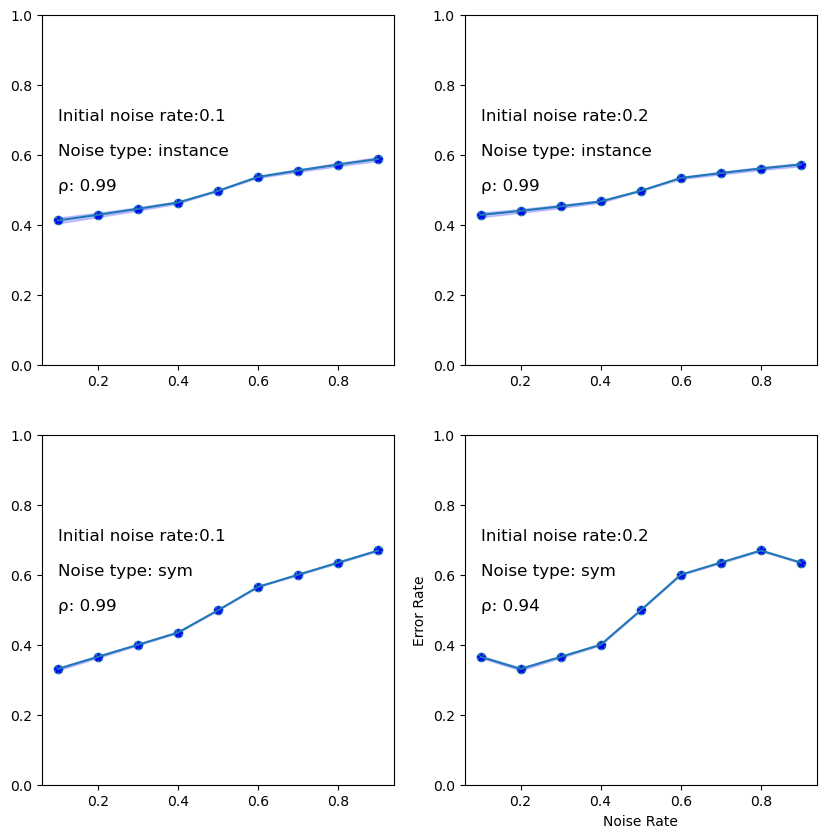

In [232]:
noise_type_list = ["instance","sym"]
initial_noise_list = [0.1,0.2]
df = pd.read_csv("./results/xyguassian_groupby.csv")

fig, axs = plt.subplots(2,2, figsize=(10, 10))
num_plots = len(noise_type_list)*len(initial_noise_list)
nrows = 2
ncols = int(num_plots/nrows)
i=0
j=0
for noise_type in noise_type_list:
    for initial_noise in initial_noise_list:
        
        df_temp = df[(df['noise_type']==noise_type) & (df['initial_noise']==initial_noise)]
        x=df_temp['noise_rate']
        y =df_temp['mean']
        y_std = df_temp['std']
        
        # Define the confidence interval
        ci = 0.1 * y_std / y
        # calculate correlation coefficient
        corr = np.corrcoef(x, y)[0, 1]


        axs[i,j].scatter(x, y, label=noise_type)     
        axs[i,j].plot(x, y, '*', color='blue')
        axs[i,j].text(x=0.1, y=0.5,s='\n\nInitial noise rate:'+str(initial_noise)+'\n\nNoise type: '+ noise_type+'\n\n\u03C1: '+str(round(corr,2)), fontsize=12)
        axs[i,j].plot(x,y)
        axs[i,j].set_ylim(0,1)
        plt.xlabel('Noise Rate')
        plt.ylabel('Error Rate')
        # Plot the confidence interval
        axs[i,j].fill_between(x, (y-ci), (y+ci), color='blue', alpha=0.2)
        #axs[i,j].savefig('./results/xyguassian_'+noise_type+'_'+str(initial_noise)+'.png')
            
        j+=1
        if j==ncols:
            i+=1
            j=0
        
plt.savefig('./results/xyguassian.png')

In [15]:
# if dataset in "krkp", "balancescale", "splice", "xyguassian" then it is causal
df['causal'] = df['dataset'].apply(lambda x: 1 if x in ["krkp", "balancescale", "splice","xyguassian"] else 0)

df.to_csv('./results/results_method1_error_rate2.csv', index=False)

# New dataset

breast-cancer-wisconsin

In [9]:
df = pd.read_csv('./datasets/wdbc/wdbc.data',header=None)

# recode the class labels maelignant as 1 and benign as 0
df[1] = df[1].apply(lambda x: 1 if x=='M' else 0)
# drop the first column
df.drop(df.columns[0], axis=1, inplace=True)
# move the class label to the last column

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
